<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="https://qworld.net" target="_blank"><img src="../images/qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by Berat Yenilen, Utku Birkan, Arda Çınar, Cenk Tüysüz and Özlem Salehi (<a href="https://qworld.net/qturkey/" target="_blank">QTurkey</a>)
        </td>        
</tr></table>

<!-- <table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table> -->
$ \renewcommand{\bra}[1]{\langle #1|} $
$ \renewcommand{\ket}[1]{|#1\rangle} $
$ \renewcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \renewcommand{\dot}[2]{ #1 \cdot #2} $
$ \renewcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \renewcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \renewcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \renewcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \renewcommand{\mypar}[1]{\left( #1 \right)} $
$ \renewcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \renewcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \renewcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \renewcommand{\onehalf}{\frac{1}{2}} $
$ \renewcommand{\donehalf}{\dfrac{1}{2}} $
$ \renewcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \renewcommand{\vzero}{\myvector{1\\0}} $
$ \renewcommand{\vone}{\myvector{0\\1}} $
$ \renewcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \renewcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \renewcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \renewcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \renewcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \renewcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \renewcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \renewcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \renewcommand{\pstate}[1]{ \lceil #1 \rfloor } $

<h1> Deutsch-Jozsa Algorithm </h1> 

Now we can sort of generalize our function $f:\{0,1\}^n \rightarrow \{0,1\}$, which means that our function $f$ takes as input an $n$-bit string $x$ and maps it to 0 or 1. In this case, we say that $f$ is constant if it maps every string of length $n$ to either 0 or 1, and it is balanced if it maps exactly half of the bit strings to 0 and the other half to 1. 

Here is an example of a constant function:

$\begin{array}{cc|c} 
input& input& output \\ 
\hline
0& 0 & 0 \\ 
0& 1 & 0 \\ 
1& 0 & 0 \\ 
1& 1 & 0 \\ 
 \end{array}
$

Here is an example of a balanced function:

$\begin{array}{cc|c} 
input& input& output \\ 
\hline
0& 0 & 0 \\ 
0& 1 & 1 \\ 
1& 0 & 1 \\ 
1& 1 & 0 \\ 
 \end{array}
$

## Problem

Given $f:\{0,1\}^n \rightarrow \{0,1\}$ as an oracle, decide whether $f$ is constant or balanced.

Note that the input size being $n$ instead of 1, does not make any change while implementing  $U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus f(x)} $. When the input is $n$ bit, $\ket{x} = \ket{ x_1x_2x_3...x_n}$ is a quantum state with $n$ qubits and $y$ is the single output qubit since the range of $f$ is $\{0,1\}$.

Similarly, phase kickback idea still applies:    $ \ket{x}\ket{-} \xrightarrow{U_f} (-1)^{f(x)} \ket{x}\ket{-} $

<h2>Reminder: Notation for Multiple Qubit Registers</h2>

To represent quantum states of arbitrary length quantum registers, we use $\ket{0}^{\otimes n}$ for representing $\ket{0} \otimes \ket{0} \otimes \cdots \otimes \ket{0}$ (repeated $n$ times). Similar notation also exists for quantum opreators. For example $ H^{\otimes n}\ket{1}^{\otimes n}$ is $ \underbrace{H\ket{1} \otimes H\ket{1} \otimes \cdots \otimes H\ket{1}}_{n \text{ times}}$.

Additionally, the notation $\ket{x}$ can be used for $x \in \mathbb{N}$, as the binary representation of the number (the length of the register is  often left implicit). For example $\ket{42}$ can mean $\ket{101010}$ in a 6 qubit register or a $\ket{00101010}$ in an 8 qubit register.

<h2>Hadamard Revisited</h2>

We know that applying Hadamard to state $\ket{0}$, we get $\frac{1}{\sqrt{2}}\left(\ket{0}+\ket{1}\right)$, and applying Hadamard to state $\ket{1}$, we obtain $\frac{1}{\sqrt{2}}\left(\ket{0}-\ket{1}\right)$.

Now let $x_1 \in \{0,1\}$. Consider the expression

$$H\ket{x_1} = \frac{1}{\sqrt{2}} \left( \ket{0} + (-1)^{x_1} \ket{1} \right) = \frac{1}{\sqrt{2}}\sum_{z\in\{0,1\}}(-1)^{x_1z}\ket{z}.$$

When $x_1=0$, then we have a plus and when $x_1=1$, then we have a minus. So, we can start expressing the state we get after applying Hadamard to an arbitrary qubit using the above expression starting from now.

What happens when we apply the $H^{\otimes n}$ to an $n$-qubit register? We can intuitively guess that applying the operator to an all 0 register would yield an equal superposition of all possible natural numbers like

$$ H^{\otimes n} \ket{0}^{\otimes n} = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n}\ket{x}.$$

What about arbitrary states? Then using the above equation we can write

\begin{align}
H^{\otimes n} \ket{x} &= \left(\frac{1}{\sqrt{2}}\sum_{z_1\in\{0,1\}}(-1)^{x_1z_1}\ket{z_1}\right) \otimes \left(\frac{1}{\sqrt{2}}\sum_{z_2\in\{0,1\}}(-1)^{x_2z_2}\ket{z_2} \right) \otimes \cdots \otimes \left(\frac{1}{\sqrt{2}}\sum_{z_n\in\{0,1\}}(-1)^{x_nz_n}\ket{z_n}\right), \\
&= \frac{1}{\sqrt{2^n}} \sum_{z \in \{0,1\}^n}(-1)^{x \cdot z}\ket{z},
\end{align}
where $\ket{x}=\ket{x_1\cdots x_n}$, $\ket{z}=\ket{z_1\cdots z_n}$ and $ x \cdot z $ is the bitwise and operation modulo 2, i.e. $ x \cdot z = \sum_{i=1}^n x_i \cdot z_i \pmod 2$.

<h3>Task 1</h3>

Apply $H^{\otimes 4}$ to $\ket{15}$. What is the result?

Solution?

$H^{\otimes 4}$ to $\ket{15}$ = $H^{\otimes 4}$ to $\ket{1111}$ 

= $\frac{1}{\sqrt{2^4}}$ ($\ket{0000}$  + $\ket{0001}$ + $\ket{0010}$ + ... + $\ket{1111}$ )

<h3>Task 2 (Optional)</h3>

Prove the above theorem for registers with arbitrary length.

<h3>Task 3 (Discussion)</h3>

- How many times do we need to use the oracle $f$, if we want to solve this problem clasically, in the worst case?

- How many times do you think we will use the oracle $f$ while solving it with a quantum computer?

We need to query the oracle ${2^{n-1} + 1}$ times to solve this problem classically. To solve it using a quantum computer, you only need to query the oracle once

<a href="A04_Deutsch_Jozsa_Algorithm_Solutions.ipynb#task3">click for our solution</a>

<h2>Algorithm</h2>

 <img src="../images/deutschjozsa.png" width="60%" align="center">

We construct a circuit with $n+1$ qubits. 

- Set the $n+1$'st qubit to state $\ket{-}$ by applying $X$ and $H$ gates.
- Apply $H$ to first $n$ qubits.
- Apply $U_f$.
- Apply $H$ to first $n$ qubits.
- Measure the first $n$ qubits. If it is $0^n$, then the function is constant. Otherwise, it is balanced.




<h2>Analysis</h2>

 <img src="../images/deutschjozsa2.png" width="60%" align="center">

This time we have a circuit with $n$ input qubits and an output qubit. The initial state is 
$$ \ket{\psi_0} = \ket{0}^{\otimes n} \ket{0}.$$

Next we apply an $X$ gate to last qubit,
$$ \ket{\psi_1} = \ket{0}^{\otimes n} \ket{1}.$$

We set last qubit to state $\ket{-}$ and apply $H$ gate to first $n$ qubits,

$$ \ket{\psi_2} = \frac{1}{\sqrt{2^n}}\sum_{x \in \{0,1\}^n} \ket{x} \otimes \ket{-}.$$

Now we apply $U_f$. Recalling phase kickback, we can rewrite our entire state as

$$ \ket{\psi_3} = \bigg[ \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} (-1)^{f(x)} \ket{x} \bigg] \otimes \ket{-}. $$

Note that we apply $U_f$ to each basis state and write our quantum state using sum notation since we have an equal superposition of them.

Now we can ignore the output qubit and only focus on the input qubits to write

$$ \ket{\psi_{3,0}} = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} (-1)^{f(x)} \ket{x}.$$

Now, we apply Hadamard to each qubit, and noting that 
$$H^{\otimes n} \ket{x} = \frac{1}{\sqrt{2^n}} \sum_{z  \in \{0,1\}^n}(-1)^{x \cdot z}\ket{z},$$
we get
$$ \ket{\psi_{4,0}} = \frac{1}{2^n} \sum_{x \in \{0,1\}^n} \sum_{z \in \{0,1\}^n}(-1)^{x\cdot z + f(x)} \ket{z}.$$

We know the probability of observing a state is equal to the square of its amplitude. Now let's focus on the state $z=\ket{0}^{\otimes n}$. Replacing $z=0$ in the above sum, its amplitude is given by

$$\frac{1}{2^n} \sum_{x \in \{0,1\}^n} (-1)^{f(x)}.$$

So, if the function is constant, then this sum adds up to 1 or -1, meaning that we observe $z=\ket{0}^{\otimes n}$ 100% of the time and the amplitudes of all other states cancel each other, resulting in 0 probability.  

Similarly, the probability of observing $z=\ket{0}^{\otimes n}$ is 0 if the function is balanced since exactly half of the terms have opposite signs and in this case we observe a non-zero string.

<h3>Task 4</h3>

You are given an oracle function called `oraclej(n)`, which returns a random quantum circuit with `n+1` qubits corresponding to a constant or balanced fuction. `oraclej(n)` represents the $U_f$ in our algorithm.

Let $n=4$. Implement the proposed algorithm to decide whether or not $f$ is constant or even. Note that qubit 4 is the output qubit.

(Note: You should be able the see the circuit structure of $U_f$, if you draw your circuit. Can you check whether your result is correct or not by looking at this circuit?)

Don't forget to run the following cell to load the oracle function.

In [2]:
#%run ../include/oracle.py
%run oracle.py

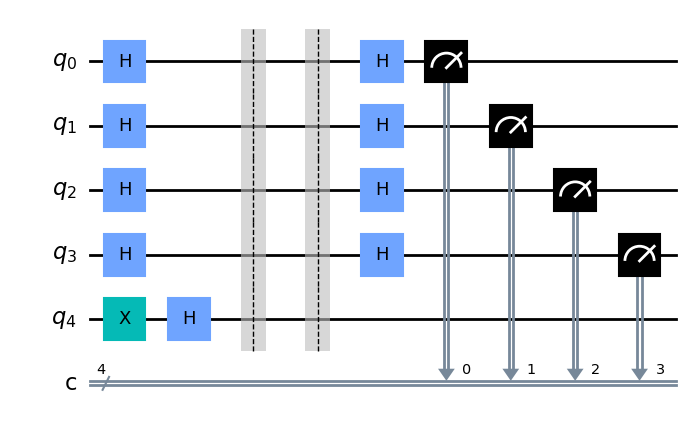

In [6]:
import random
from qiskit import QuantumCircuit, execute, Aer

dj_circuit = QuantumCircuit(5, 4)

# Your code here

# set n+1'th qubit to |-> state by applying NOT & Hadamard
dj_circuit.x(4)
dj_circuit.h(4)

# apply Hadamard to the first n qubits
for i in range(4):
    dj_circuit.h(i)

# apply Uf
dj_circuit.compose(oraclej(4), inplace = True)

# apply Hadamard to the first n qubits
for i in range(4):
    dj_circuit.h(i)

dj_circuit.measure(range(4), range(4))

dj_circuit.draw(output='mpl')

In [5]:
job = execute(dj_circuit, Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts()
print(counts)

{'0010': 10000}


<a href="A04_Deutsch_Jozsa_Algorithm_Solutions.ipynb#task4">click for our solution</a>

<h3>Task 5</h3>

Write two functions `balanced(n)` and `constant(n)` to randomly generate quantum circuits with $n+1$ qubits that implement a function $ f : \{0, 1\}^n \rightarrow \{0, 1\} $ such that $f$ is either constant or balanced. 

Note that qubit $n$ is the output qubit.

In [7]:
import random
from qiskit import QuantumCircuit, execute, Aer

def balanced(n):
    circuit = QuantumCircuit(n+1)
    circuit.barrier()
    
    # ... generate balanced circuit here
    # f(x) = 1 if the first qubit is 1 
    # f(x) = 0 if the first qubit is 0 
    circuit.cx(0, n)

    circuit.barrier()
    return circuit
    
def constant(n):
    circuit = QuantumCircuit(n+1)
    circuit.barrier()

    # do nothing :) 

    circuit.barrier()
    return circuit

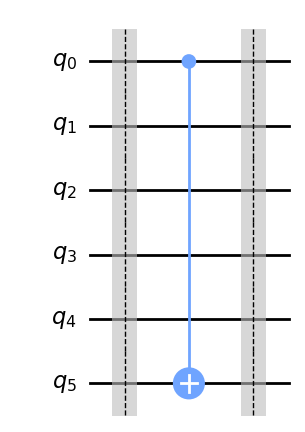

In [12]:
n=5
balanced(n).draw(output='mpl')

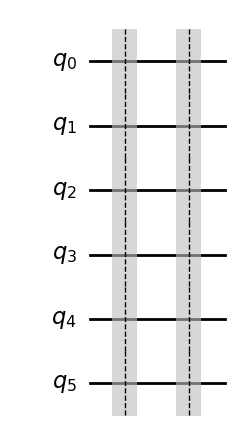

In [9]:
n=5
constant(n).draw(output='mpl')

<a href="A04_Deutsch_Jozsa_Algorithm_Solutions.ipynb#task5">click for our solution</a>

In contrast to the classical strategy, which requires exponentially many queries, Deutsch-Jozsa can solve the same problem making only 1 query. This is an exponential seperation, with respect to an oracle, that is in the oracle model of computation. Nevertheless, there also exists a probabilistic algorithm solving the same problem making only 3 queries. Can we do better and show that quantum beats the probabilstic?
